In [1]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# main dependencies needed
import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [3]:
Base_data = '/content/drive/MyDrive/BREASTCANCER'


**Preprocessing**

In [16]:
# Preprocessing
import cv2
import os
import imghdr
data = tf.keras.utils.image_dataset_from_directory(Base_data, image_size=(224,224))
data_dir = Base_data 
image_exts = ['png','jpeg']
image_size = (224, 224)

for image_class in os.listdir(data_dir): 
    for image_name in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image_name)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            #if tip not in image_exts or 'mask' in image_name: 

            if tip not in image_exts or 'mask' in image_name: 
                # print('Image not in ext list or has mask in its name: {}'.format(image_path))
                os.remove(image_path)
            else:
                img = cv2.resize(img, image_size)
                cv2.imwrite(image_path, img)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Found 647 files belonging to 2 classes.


In [17]:
# Display the name of classes and their corresponding number of files.
number_of_images = {}
for dir in os.listdir(Base_data):
  number_of_images[dir] = len(os.listdir(os.path.join(Base_data, dir)))

number_of_images.items()

dict_items([('benign', 437), ('malignant', 210)])

In [18]:
# Encoding the classes
unique_classes = []
for path in os.listdir(Base_data):
    unique_classes.append(path)
print(unique_classes)
class_index = [unique_classes[1], unique_classes[0]]
label_encoder = LabelEncoder()

# Fit the encoder to the unique classes and transform the class_index
encoded_classes = label_encoder.fit_transform(class_index)

# Print the encoded classes with their respective index values
for c, e in zip(class_index, encoded_classes):
    print(c, "-", e)

['benign', 'malignant']
malignant - 1
benign - 0


In [19]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()



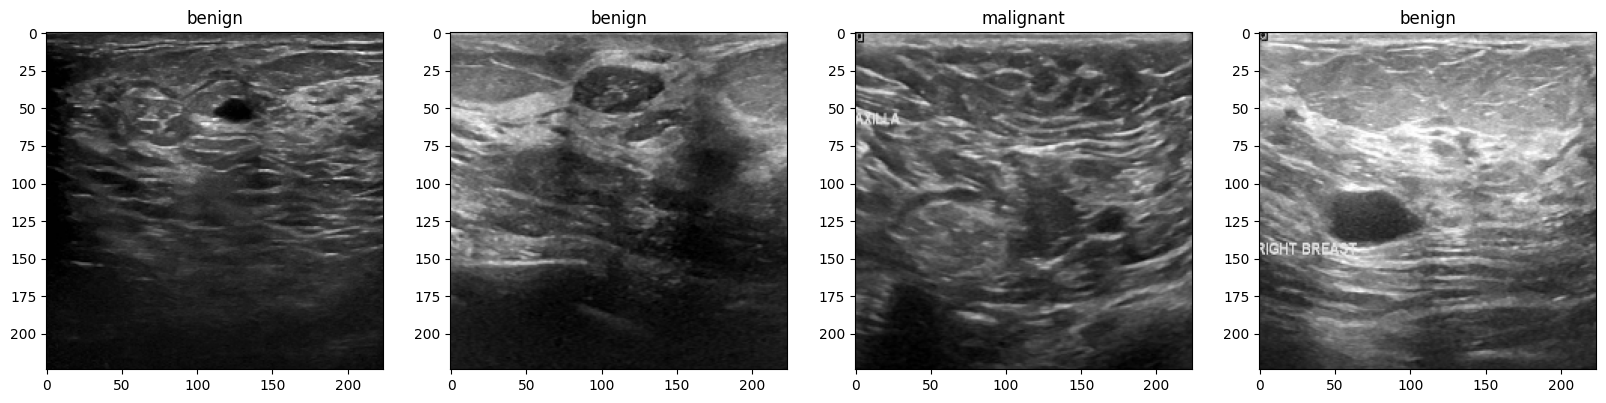

In [20]:
# Display some examples - 0 is benign and 1 is malignant
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    if batch[1][idx] == 0:
        ax[idx].title.set_text('benign')
    else:
        ax[idx].title.set_text('malignant')

In [21]:
# Scale the data 
# We standardize the pixels to range 0-1

data = data.map(lambda x,y: (x/255, y))
data.as_numpy_iterator().next()


(array([[[[0.46666667, 0.46666667, 0.46666667],
          [0.45490196, 0.45490196, 0.45490196],
          [0.6627451 , 0.6627451 , 0.6627451 ],
          ...,
          [0.80784315, 0.80784315, 0.80784315],
          [0.7882353 , 0.7882353 , 0.7882353 ],
          [0.7647059 , 0.7647059 , 0.7647059 ]],
 
         [[0.00784314, 0.00784314, 0.00784314],
          [0.        , 0.        , 0.        ],
          [0.69411767, 0.69411767, 0.69411767],
          ...,
          [0.76862746, 0.76862746, 0.76862746],
          [0.7137255 , 0.7137255 , 0.7137255 ],
          [0.7058824 , 0.7058824 , 0.7058824 ]],
 
         [[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.6431373 , 0.6431373 , 0.6431373 ],
          ...,
          [0.7254902 , 0.7254902 , 0.7254902 ],
          [0.69411767, 0.69411767, 0.69411767],
          [0.6745098 , 0.6745098 , 0.6745098 ]],
 
         ...,
 
         [[0.08627451, 0.08627451, 0.08627451],
          [0.09411

In [22]:
# Split the data 
train_size = int(len(data)*.7)
# Used During Training
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)


In [23]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

**Build Model**

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()

# Conv layer 1
model.add(Conv2D(32, (3,3), 1, activation='relu', padding='same', input_shape=(224,224,3)))
model.add(MaxPooling2D())

# Conv layer 2
model.add(Conv2D(64, (3,3), 1, activation='relu', padding='same'))
model.add(MaxPooling2D())

# Conv layer 3
model.add(Conv2D(32, (3,3), 1, activation='relu', padding='same'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(224, activation='relu'))
# Applied drop rate to reduce overfitting
model.add(Dropout(0.2)) 
# output layer
model.add(Dense(1, activation='sigmoid'))



**Compile the Model**

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


Model Summary

In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 32)       0

**Model Training**

In [ ]:
tmodel = model.fit(train, validation_data= val, epochs=10, batch_size=32)

Epoch 1/10
28/28 [==============================] - 101s 3s/step - loss: 0.6588 - accuracy: 0.6607 - val_loss: 0.5955 - val_accuracy: 0.6562
Epoch 2/10
28/28 [==============================] - 98s 3s/step - loss: 0.5596 - accuracy: 0.7165 - val_loss: 0.5845 - val_accuracy: 0.6992
Epoch 3/10
28/28 [==============================] - 97s 3s/step - loss: 0.4705 - accuracy: 0.7924 - val_loss: 0.4485 - val_accuracy: 0.7734
Epoch 4/10
28/28 [==============================] - 96s 3s/step - loss: 0.3898 - accuracy: 0.8237 - val_loss: 0.4161 - val_accuracy: 0.8320
Epoch 5/10
28/28 [==============================] - 98s 3s/step - loss: 0.2848 - accuracy: 0.8817 - val_loss: 0.3610 - val_accuracy: 0.8594
Epoch 6/10
28/28 [==============================] - 108s 4s/step - loss: 0.2103 - accuracy: 0.9230 - val_loss: 0.4971 - val_accuracy: 0.8594
Epoch 7/10
28/28 [==============================] - 108s 4s/step - loss: 0.1550 - accuracy: 0.9342 - val_loss: 0.3192 - val_accuracy: 0.8945
Epoch 8/10
28/28 

**Performance Graphs Plots**

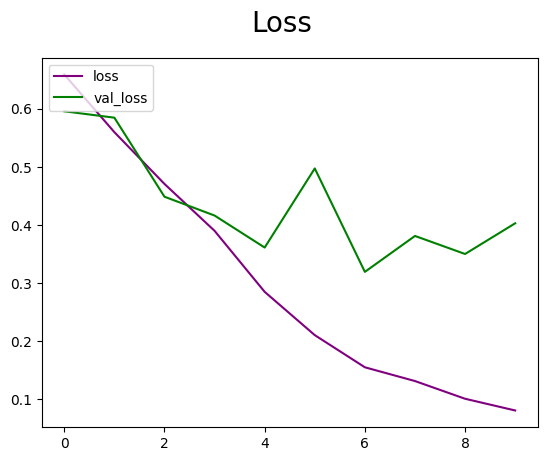

In [ ]:
# Plot Loss Graph
fig = plt.figure()
plt.plot(tmodel.history['loss'], color='purple', label='loss')
plt.plot(tmodel.history['val_loss'], color='green', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

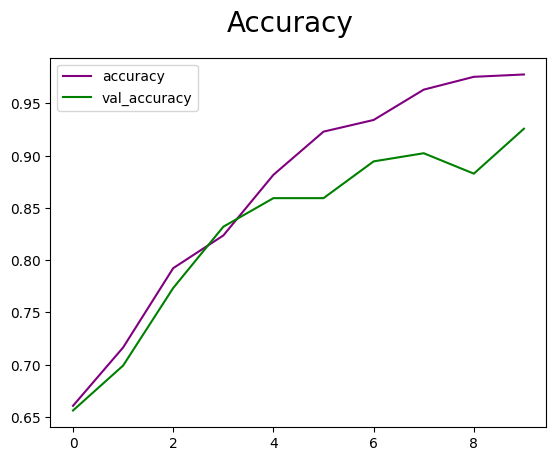

In [ ]:
# Accuracy Graph
fig = plt.figure()
plt.plot(tmodel.history['accuracy'], color='purple', label='accuracy')
plt.plot(tmodel.history['val_accuracy'], color='green', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

**Performance Evaluation**

In [ ]:
# To test performance of the model, we used 1 batch of the test dataset
import pandas as pd
from keras.metrics import Precision, Recall, BinaryAccuracy
pre = Precision()
re = Recall()
acc = BinaryAccuracy()
# Use the test batch we had et aside.
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)
print(f'Precision : {pre.result().numpy()}, Recall:{re.result().numpy()},Accuracy:{acc.result().numpy()}')

1/1 [==============================] - 1s 768ms/step
Precision : 0.8529411554336548, Recall:0.8055555820465088,Accuracy:0.90625


In [ ]:
# Test on the first batch
y = y.reshape((-1,))
yhat = yhat.reshape((-1,))
yhat = yhat.round()
dfNew = pd.DataFrame(data={"Actual Value": y, "Predicted Value": yhat})

pd.set_option('display.max_rows', None)
dfNew


,Actual Value,Predicted Value
0,1,0.0
1,0,0.0
2,0,0.0
3,1,0.0
4,1,1.0
5,0,0.0
6,0,0.0
7,1,1.0
8,0,0.0
9,0,0.0


**Classification Report**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix 
report = classification_report(y, yhat, target_names=['benign', 'malignant'], digits=4)
print(report)


              precision    recall  f1-score   support

      benign     0.8000    0.9412    0.8649        17
   malignant     0.9167    0.7333    0.8148        15

    accuracy                         0.8438        32
   macro avg     0.8583    0.8373    0.8398        32
weighted avg     0.8547    0.8438    0.8414        32



**Confusion Matrix**

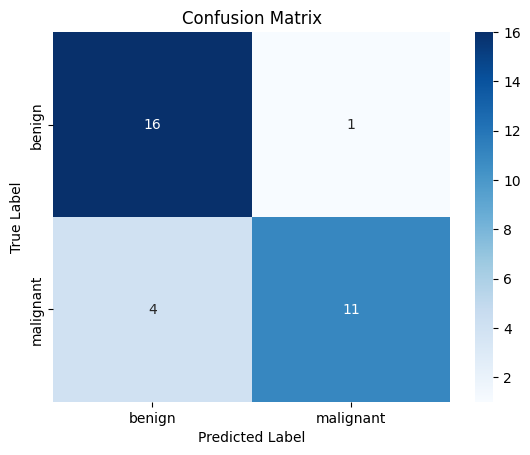

In [ ]:
# Define class labels
import seaborn as sns
# Compute confusion matrix 
cm = confusion_matrix(y, np.round(yhat))
class_names = ['benign', 'malignant']

# Plot heatmap of confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

**Test Single Images**

***Malignant Image***

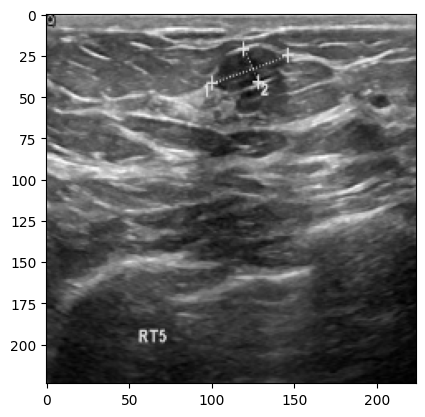

In [ ]:
img = cv2.imread('/content/drive/MyDrive/BImages/malignant (10).png')
resize = tf.image.resize(img, (224,224))
plt.imshow(resize.numpy().astype(int))
plt.show()


In [ ]:
# Image Score between the range of 0 to 1
Img_pred = model.predict(np.expand_dims(resize/255, 0))
# Get the score value of the Image. Note the range should be between 0 and 1.
Img_pred.item()

1/1 [==============================] - 0s 50ms/step


0.9991111159324646

In [ ]:
# Function to classify Image
def classifyImage(Img_pred):
  if Img_pred > 0.5: 
      print('You have Breast Cancer. It is MALIGNANT')
  else:
      print('You have a tumor that is BENIGN.')
  
classifyImage(Img_pred)

You have Breast Cancer. It is MALIGNANT


***Benign Image***

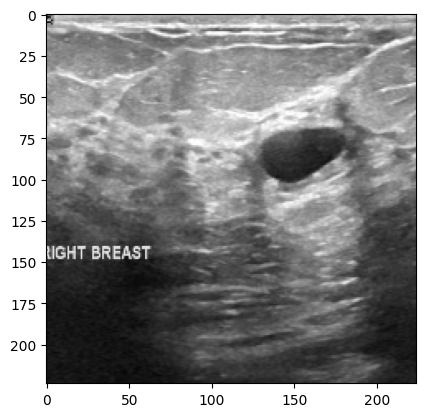

In [ ]:
img = cv2.imread('/content/drive/MyDrive/BImages/benign (3).png')
resize = tf.image.resize(img, (224,224))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
Img_pred = model.predict(np.expand_dims(resize/255, 0))
Img_pred.item()

1/1 [==============================] - 0s 65ms/step


0.0007107008132152259

In [ ]:
classifyImage(Img_pred)

You have a tumor that is BENIGN.


**Save Model**

In [ ]:
from keras.models import load_model
model.save('/content/drive/MyDrive/BImages/tscratch_breastCancerClassifier.h5')


**Using a VGG19 pretrained Model**

In [25]:
from keras.applications import VGG19
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout

# Load the VGG19 model without the top layers (include_top=False)
vgg_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freezing the VGG19 model layers weights
for layer in vgg_model.layers:
    layer.trainable = False

# Creating a new model a new model using the VGG19 model as a base
model = Sequential()
model.add(vgg_model)


# Adding  a new classifier layer on top of the base model
model.add(Flatten())
model.add(Dense(224, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))



In [26]:
# Model Summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_2 (Dense)             (None, 224)               5619936   
                                                                 
 dropout_1 (Dropout)         (None, 224)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 225       
                                                                 
Total params: 25,644,545
Trainable params: 5,620,161
Non-trainable params: 20,024,384
_________________________________________________________________


In [28]:
# Compile the model with the desired optimizer and loss function
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model using the data
history = model.fit(train, epochs=5, batch_size=32,validation_data=val)

Epoch 1/5
14/14 [==============================] - 474s 35s/step - loss: 1.6989 - accuracy: 0.6295 - val_loss: 0.6270 - val_accuracy: 0.7656
Epoch 2/5
14/14 [==============================] - 476s 35s/step - loss: 0.5609 - accuracy: 0.7946 - val_loss: 0.3800 - val_accuracy: 0.8359
Epoch 3/5
14/14 [==============================] - 461s 34s/step - loss: 0.3884 - accuracy: 0.8326 - val_loss: 0.3079 - val_accuracy: 0.8594
Epoch 4/5
14/14 [==============================] - 455s 33s/step - loss: 0.2548 - accuracy: 0.8996 - val_loss: 0.2580 - val_accuracy: 0.8750
Epoch 5/5
14/14 [==============================] - 454s 33s/step - loss: 0.2388 - accuracy: 0.9062 - val_loss: 0.1962 - val_accuracy: 0.9531


**Performance Graphs**

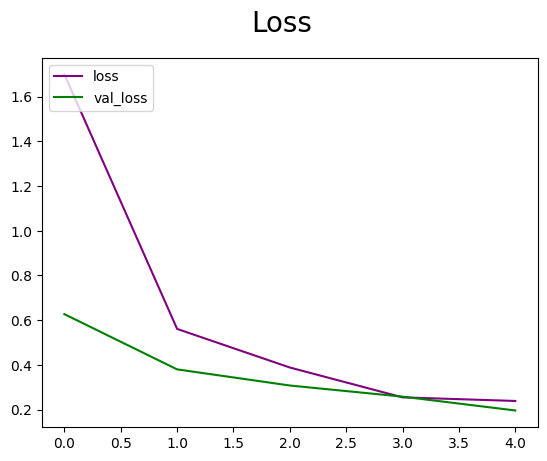

In [29]:
# Plot Loss Graph
fig = plt.figure()
plt.plot(history.history['loss'], color='purple', label='loss')
plt.plot(history.history['val_loss'], color='green', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

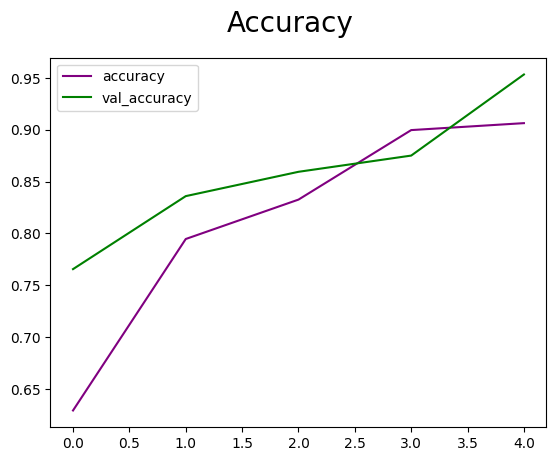

In [30]:
# Plot Accuracy Graph
fig = plt.figure()
plt.plot(history.history['accuracy'], color='purple', label='accuracy')
plt.plot(history.history['val_accuracy'], color='green', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

**Performance Evaluation**

In [31]:
# Model Perfomance
import pandas as pd
X = []
y = []

# Load the test data
for batch in test.as_numpy_iterator():
    A, b = batch
    X.append(A)
    y.append(b)

X = np.concatenate(X, axis=0)
y = np.concatenate(y, axis=0)

# Predict on the entire test data
yhat = model.predict(X)

2/2 [==============================] - 45s 24s/step


In [32]:
# Test on the first batch
y = y.reshape((-1,))
yhat = yhat.reshape((-1,))
yhat = yhat.round()
dfNew = pd.DataFrame(data={"Actual Value": y, "Predicted Value": yhat})

pd.set_option('display.max_rows', None)
dfNew


,Actual Value,Predicted Value
0,0,0.0
1,1,1.0
2,0,0.0
3,0,0.0
4,1,1.0
5,0,0.0
6,1,1.0
7,0,0.0
8,0,0.0
9,1,1.0


**Classification Report**

In [33]:
from sklearn.metrics import classification_report, confusion_matrix 
report = classification_report(y, yhat, target_names=['benign', 'malignant'], digits=4)
print(report)


              precision    recall  f1-score   support

      benign     0.9556    1.0000    0.9773        43
   malignant     1.0000    0.9048    0.9500        21

    accuracy                         0.9688        64
   macro avg     0.9778    0.9524    0.9636        64
weighted avg     0.9701    0.9688    0.9683        64



**Confusion Matrix**

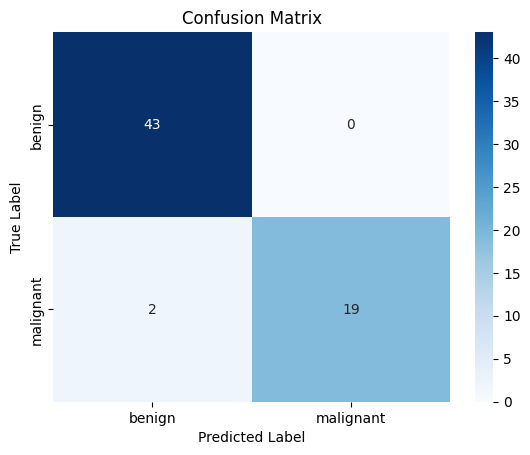

In [34]:
# Define class labels
import seaborn as sns
# Compute confusion matrix 
cm = confusion_matrix(y, np.round(yhat))
class_names = ['benign', 'malignant']

# Plot heatmap of confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

**Test on Some Images**

***benign image***

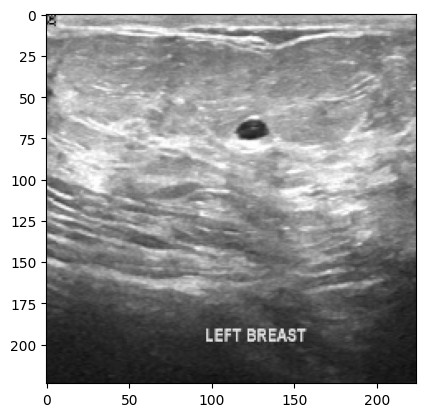

In [35]:
img = cv2.imread('/content/drive/MyDrive/Hackfest_Images/BREASTCANCER/benign (1).png')
resize = tf.image.resize(img, (224,224))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [36]:
Img_pred = model.predict(np.expand_dims(resize/255, 0))
Img_pred.item()

1/1 [==============================] - 1s 1s/step


0.01711316592991352

In [37]:
def classifyImage(Img_pred):
  if Img_pred > 0.5: 
      print('You have Breast Cancer. It is MALIGNANT')
  else:
      print('You have a tumor that is BENIGN.')
  
classifyImage(Img_pred)

You have a tumor that is BENIGN.


**malignant image**

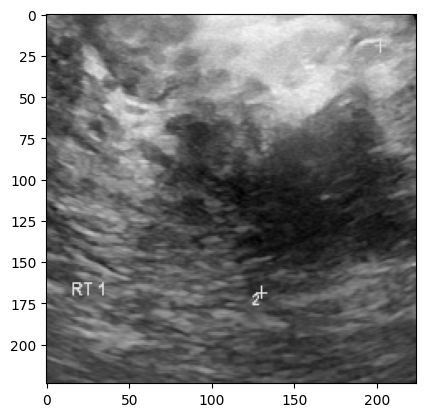

In [38]:
img = cv2.imread('/content/drive/MyDrive/Hackfest_Images/BREASTCANCER/malignant (2).png')
resize = tf.image.resize(img, (224,224))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [39]:
Img_pred = model.predict(np.expand_dims(resize/255, 0))
Img_pred.item()

1/1 [==============================] - 1s 613ms/step


0.9632678627967834

In [40]:
classifyImage(Img_pred)

You have Breast Cancer. It is MALIGNANT


**Save the new model ( which includes pretrained model)**

In [41]:
from keras.models import load_model
model.save('/content/drive/MyDrive/Hackfest_AIModels/breastCancerClassifier.h5')